## Name  : Arivazhagan.B

## Topic : Students Habits & Performance Analysis

## Email : barivazhagan@gmail.com

## Project Title:

**Predicting Student Exam Performance from Lifestyle and Study Habits Using  Multiple LinearRegression in Machine Learning**   

## Multiple Linear Regression(MLR)

Multiple linear regression (MLR) is a statistical method that predicts a dependent variable using multiple independent variable.It's an extension of simple linear regression ,which uses only one independent variables.

## Objective:

* To build a machine learning model that predicts a student's exam score based on their daily habits, health indicators and demographic information.

* This can help education and policy-markers identify key life style factors that influence academic success.

## Dataset Summary:

* **Total Records** : 1000 students

* **Target Variable** : Exam Score 

* **Feature Categories** :

     * Demographics : Age,Gender,Parental education level.

     * **Lifestyle & Habits** :

       * Study : Study hours per day,Attendance percentage

       * Distractions : Social media hours, Netflix hours

       * Wellness : Sleep hours,Diet quality,Excercise Frequency,Mental health rating

       * Environment : Internet quality,Part time job,Extracurricular participation.




## Dataset Features:


**Numerical :**

     * Study hours per day,sleep hours,social media hours,Netflix hours,Exam score.

**Categoriacal:**

     * Gender,Diet quality,Parental level ,Internet quality,Part time job,Extracuricular participation.

## Expected Outcome: 

* A predict model that estimates a student's exam score.

* Actionable insights about which daily habits improve or hinder academic performance.

* A ranked list of lifestyle factors based on their influence on performance.

## Projects Steps:

**Import Libraries**

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

**Load dataset**

In [6]:
df=pd.read_csv(r'C:\Users\ELCOT\Desktop\csv file\Machine Learning\student_habits_performance.csv')
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


** info()-It will give us to No of rows and columns,Non-Null values in each columns,datatype and memory storage of  our dataset. **

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

** describe-It will give us to aggregate fuction.Like,np.mean,np.count,np.median,np.max,np.min,np.std. **

In [39]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


**Data Pre-processing**

** isnull().sum()-It is used to identify the total number of Non-Null values in each column of your dataset. ** 

In [9]:
df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

** fillna-It is used to fill the missing values in each column of the dataset. **

In [13]:
#mode-The value that upper most frequently in column. 
df['parental_education_level'].mode() 

0    High School
Name: parental_education_level, dtype: object

In [19]:
df['parental_education_level'].fillna('High School',inplace=True)# Fill missing values in categorical column using mode

In [23]:
df.isnull().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

** LabelEncoder- It is used to convert categorical lables into numeric values **

In [26]:
for col in df.select_dtypes(include="object").columns:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])

In [28]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,0,23,0,0.0,1.2,1.1,0,85.0,8.0,0,6,2,0,8,1,56.2
1,1,20,0,6.9,2.8,2.3,0,97.3,4.6,1,6,1,0,8,0,100.0
2,2,21,1,1.4,3.1,1.3,0,94.8,8.0,2,1,1,2,1,0,34.3
3,3,23,0,1.0,3.9,1.0,0,71.0,9.2,2,4,2,1,1,1,26.8
4,4,19,0,5.0,4.4,0.5,0,90.9,4.9,0,3,2,1,1,0,66.4


**Exploratory Data Analysis (EDA)**

It is the process of analyzing datasets to summarize their main characteristics,often using visual methods.

**Key Steps:**

* Understand the structure of your data

* Detect outliers 

* Uncover patterns,trends, and relationships

* Test assumptions

* Guide further analysis or model building .

** Correlation Heatmap **

In [79]:
numeric_cols=df.select_dtypes(include=['int64','float64'])

[]

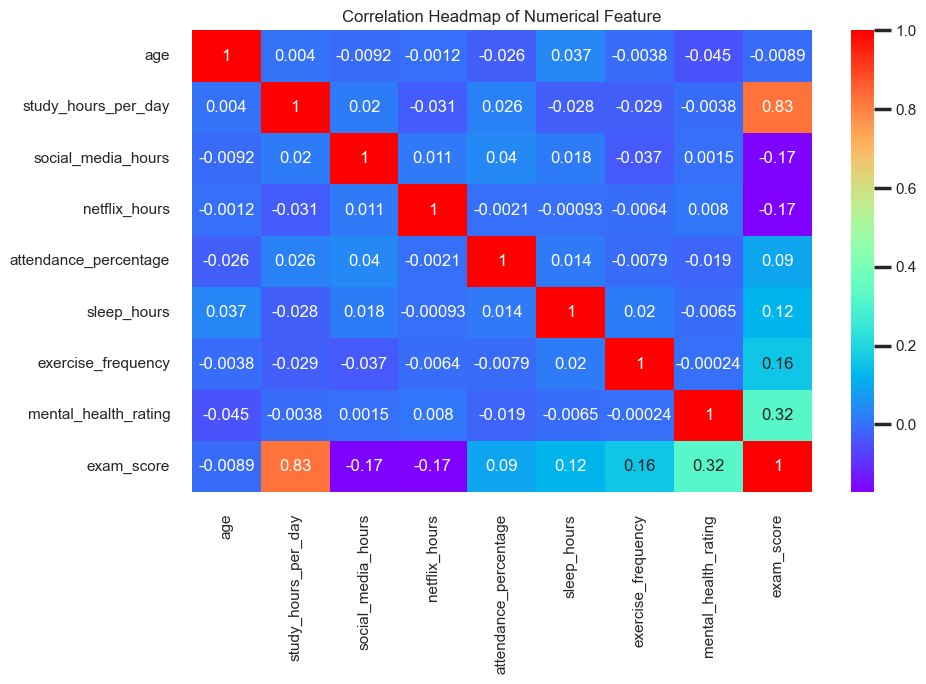

In [133]:
sns.set_style('whitegrid') 
sns.set_context('poster',font_scale=0.5)
plt.figure(figsize=(10,6))
sns.heatmap(numeric_cols.corr(),annot=True,cmap='rainbow')# It shows how numerical feature relate to each other
plt.title('Correlation Headmap of Numerical Feature')
plt.plot()

**Distribution plots for key variables**

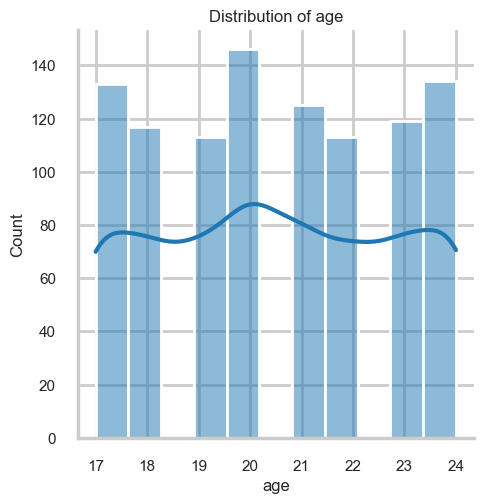

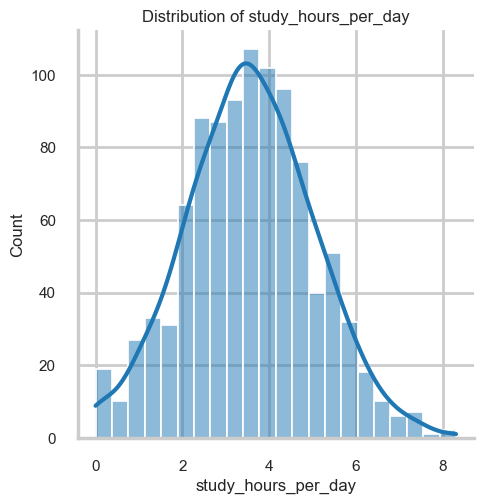

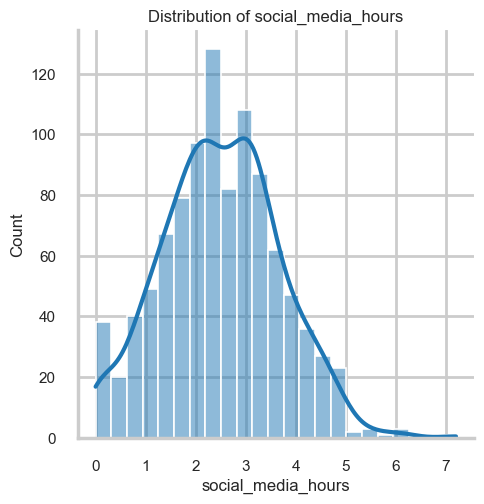

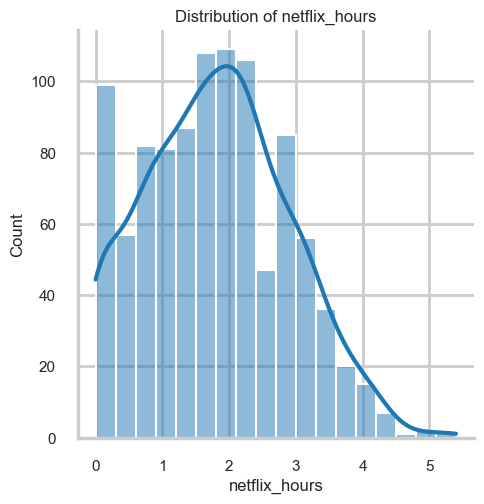

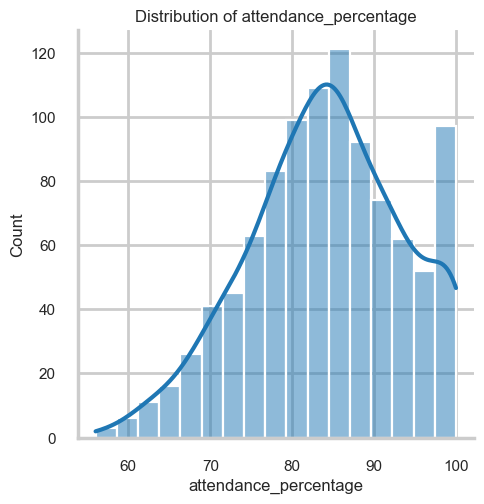

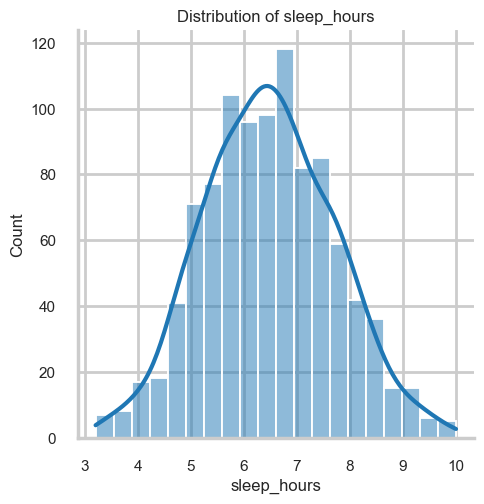

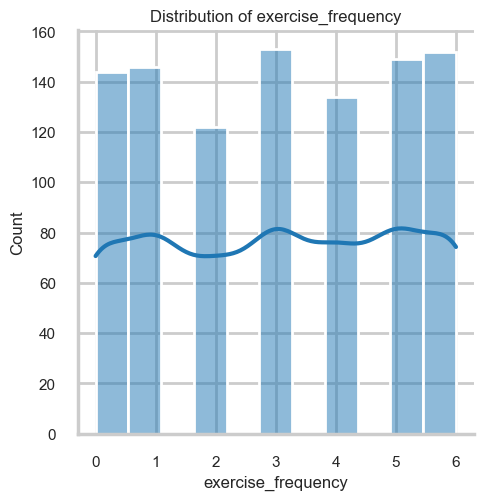

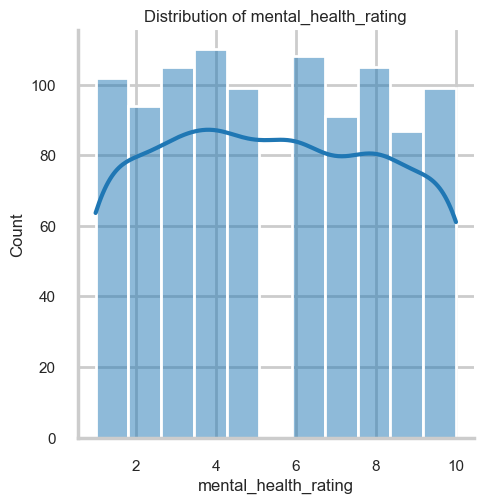

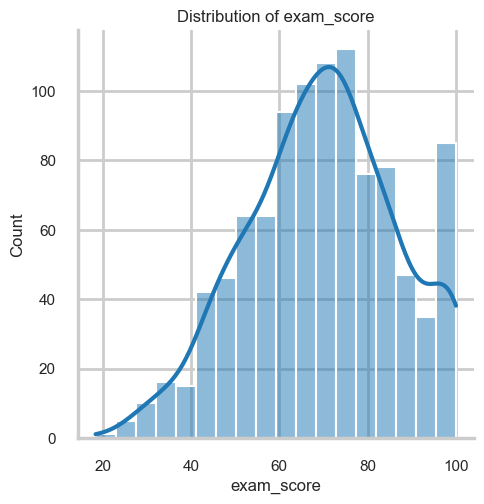

In [135]:
for column in numeric_cols:
    sns.displot(df[column],kde=True)#It show the frequency of data within intervals and KDE in a flexible way.
    plt.title(f'Distribution of {column}')
    plt.show()

**Boxplot for Categorical features vs exam_scores**

In [119]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

In [123]:
categorical_column=df[['gender','internet_quality','part_time_job','diet_quality','parental_education_level','extracurricular_participation']]


C:\Users\ELCOT\AppData\Local\Temp\ipykernel_25628\4265810213.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=column,y='exam_score',palette='rainbow')


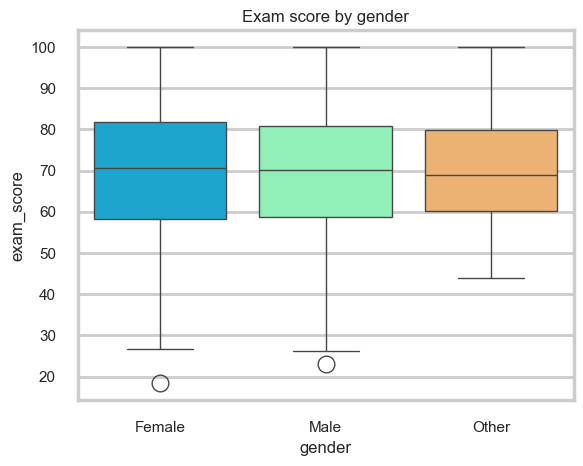

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_25628\4265810213.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=column,y='exam_score',palette='rainbow')


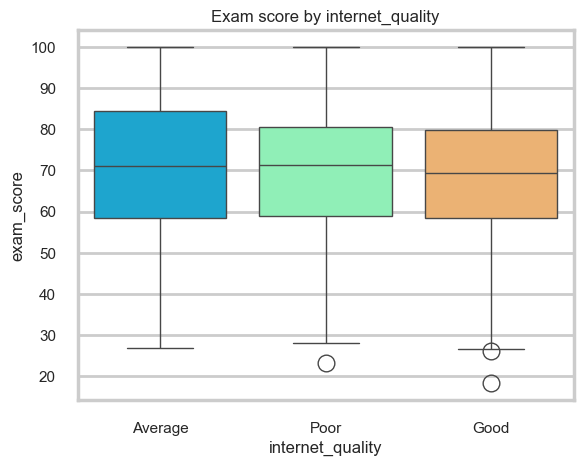

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_25628\4265810213.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=column,y='exam_score',palette='rainbow')


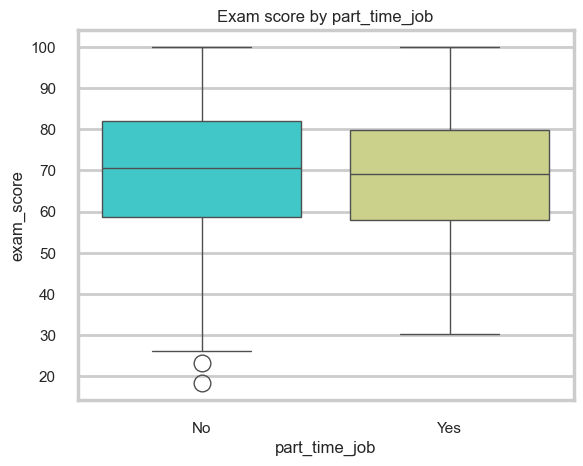

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_25628\4265810213.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=column,y='exam_score',palette='rainbow')


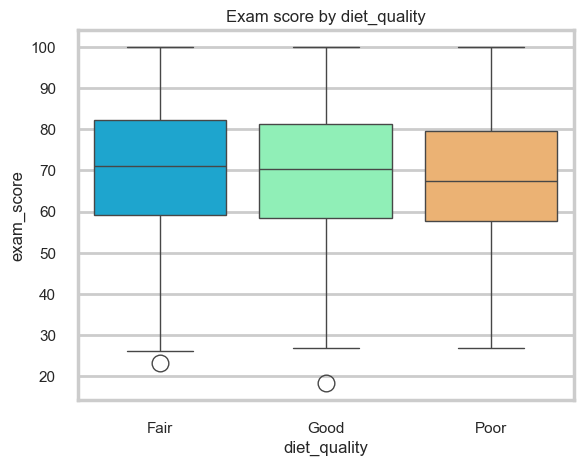

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_25628\4265810213.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=column,y='exam_score',palette='rainbow')


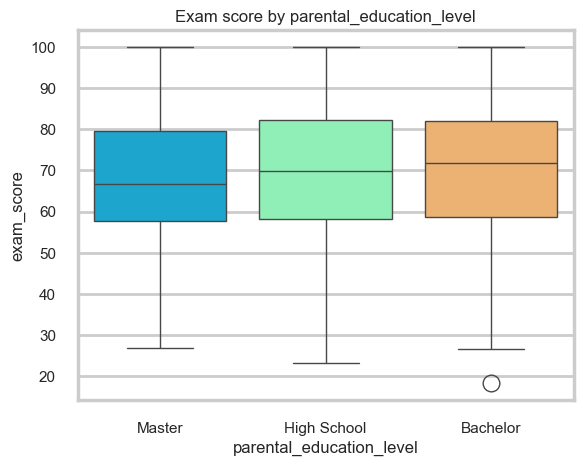

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_25628\4265810213.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=column,y='exam_score',palette='rainbow')


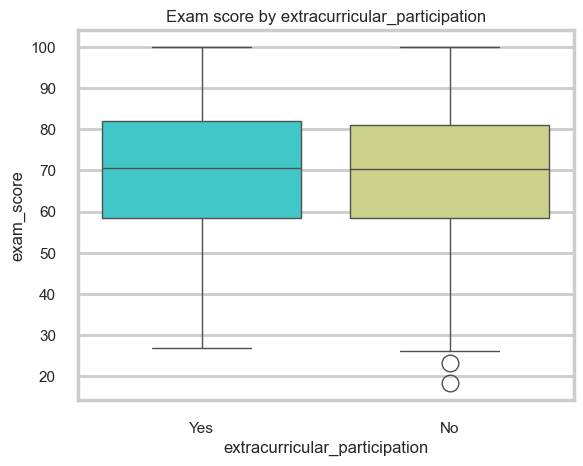

In [137]:
for column in categorical_column:
    sns.boxplot(data=df,x=column,y='exam_score',palette='rainbow')
    plt.title(f'Exam score by {column}')
    plt.show()   

**Scale the Feature**

** Segregate data into Independent Variable(x) and Dependent Variable(y).

In [34]:
x=df.drop('exam_score',axis=1)
y=df['exam_score']

In [36]:
print(x.shape,y.shape)

(1000, 15) (1000,)


** Spliting data into Training and Testing **

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#random_state-It is used to control the randomness of a process,ensuring reproducibility.
#random_state=42 is just a popular,consistent choice,There's no statistical or performace advantage to that number specifically.

** StandardScaler - It is used to standardizes numerical values by removing the mean and scaling to unit variance **

In [49]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

**Build and Train the Linear Model**

In [53]:
model=LinearRegression()
model.fit(x_train_scaled,y_train)

LinearRegression()

** Training values **

In [57]:
model.score(x_train_scaled,y_train)

0.9017643203643706

** Testing values **

In [63]:
model.score(x_test_scaled,y_test)

0.8964547009225124

**Make Prediction and Evaluate**

** Accuracy for prediction on test data **

In [117]:
x_test_pred=model.predict(x_test_scaled)
x_test_pred
rmse=np.sqrt(mean_squared_error(y_test,x_test_pred))
mse=mean_absolute_error(y_test,x_test_pred)
r2=r2_score(y_test,x_test_pred)
print('Root Mean Square Error',rmse)
print('Mean Square Error',mse)
print('R^2 Score',r2)
print('x_pred:\n\n',x_test_pred)

Root Mean Square Error 5.152865944063533
Mean Square Error 4.180955016598989
R^2 Score 0.8964547009225124
x_pred:

 [ 66.26415254  74.87900685  77.54659914  73.81946999  61.76161178
  54.32898931  76.01448305  55.69259161  41.02235758  73.02689206
  40.81021763 102.60875086  57.96164974  71.78118993  35.50193036
  57.22875202  73.43154069  68.94521096  65.64941637  50.34148092
  55.84437058  62.92100272  51.21955436  88.08378282  69.82978638
  71.51764938  69.20843434  55.96012969  69.41363407  67.91377148
  65.22179917  79.16669723  63.94732993  81.49920695  60.89827594
  51.35268873  70.54062667  58.7043076   64.76842491  97.76002836
  50.42186154  85.78261841  67.59286476  63.85550486  94.45151826
  82.57875193  52.75140192  79.26379111  63.58934386  64.53759247
  66.2891751   46.90839606  71.31719741  77.66508057  45.26281216
  76.00066761  73.38457818  69.29027692  64.46531678  48.59500552
  86.22797388  75.79843341  75.87108932  46.87164033  72.60169945
  50.09013442  69.2009492 

** Visualizing the actual Score and predicted price **

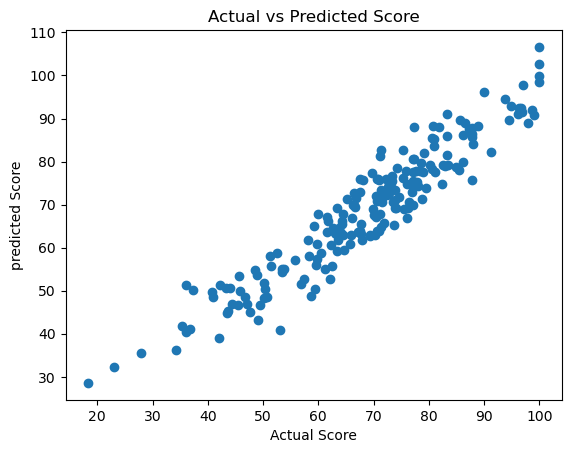

In [113]:
plt.scatter(y_test,x_test_pred)
plt.xlabel('Actual Score')
plt.ylabel('predicted Score')
plt.title('Actual vs Predicted Score')
plt.show()

## Conclusion:

* Multiple Linear Regression gave the best result compared to other models(Random Forest Regression,Support vector Regression(SVR),Decision Tree Regression).

## Key Insights:

* Higher study hours,mental_health_rating and sleep quality correlated with higher scores.

* Social media and Netflix usage negative impact performance.

* Parental education and diet quality also play important roles.